In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster  import KMeans
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_context('talk')
sns.set_style('whitegrid')

In [3]:
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)

In [4]:
X = np.append([np.cos(angle)], [np.sin(angle)], axis=0).T

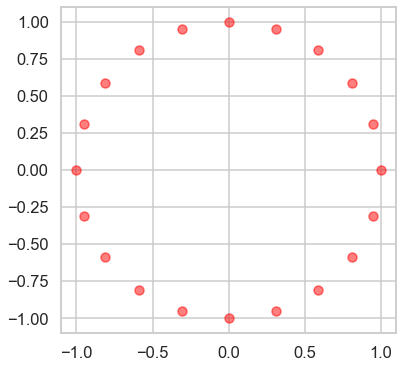

In [5]:
plt.scatter(X[:, 0], X[:, 1], color='red', alpha=0.5)

In [6]:
Km = KMeans(n_clusters=3, random_state=24, n_init=10)

In [7]:
Km = Km.fit(X)

In [8]:
X

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

In [9]:
Km.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0])

In [16]:
def display_cluster(n_clusters, k_est, X):
    color='bgrcmyk'
    alpha=0.7
    plt.gca().set_aspect('equal')
    if n_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[4], alpha=alpha, s=20)
    else:
        for i in range(n_clusters):
            plt.scatter(X[k_est.labels_ == i, 0], X[k_est.labels_ == i, 1], c=color[i], alpha=alpha, s=20)
            plt.scatter(k_est.cluster_centers_[i, 0], k_est.cluster_centers_[i, 1], c=color[i], marker='+')
            
            

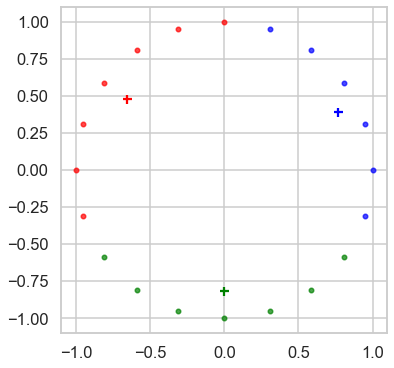

In [17]:
display_cluster(3, Km, X)  # clusters change everytime we run. this is because of initialization

### Determining the number of clusters

In [24]:
from sklearn.datasets import make_blobs

In [35]:
n_samples = 1000
n_bins = 3
centers = [(-3, -3), (0, 0), (3, 3), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=42, cluster_std=1.0, shuffle=False, n_features=2)

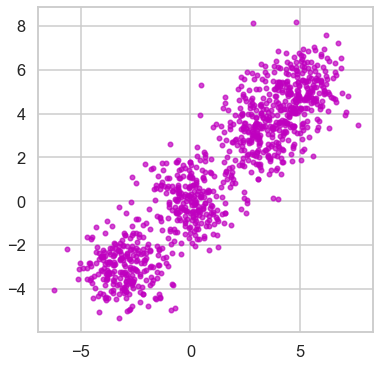

In [36]:
display_cluster(0, None, X)

In [37]:
K_means = KMeans(n_clusters=3)

In [38]:
K_means = K_means.fit(X)

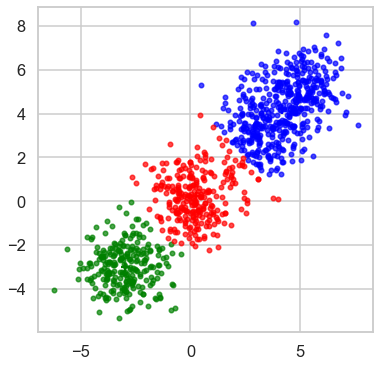

In [39]:
display_cluster(3, K_means, X)

In [40]:
K_means.inertia_

2720.8802661496875

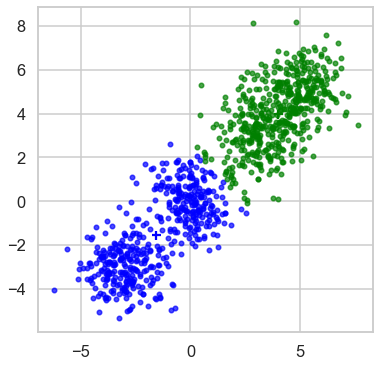

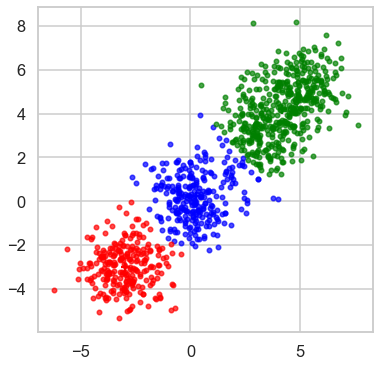

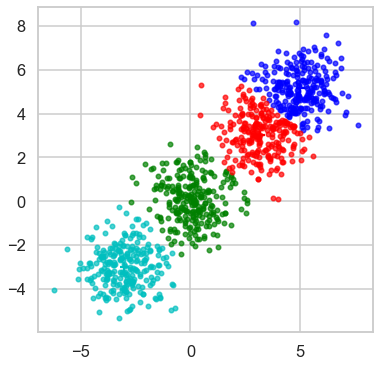

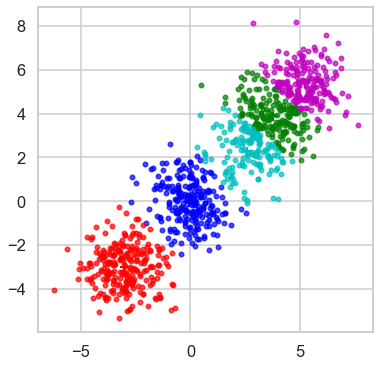

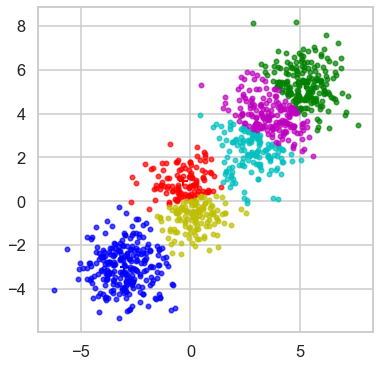

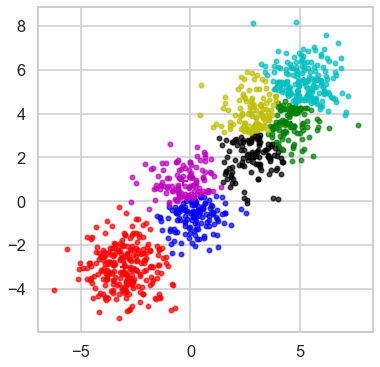

In [41]:
inertia_hist = []
K_means = KMeans(random_state=24, n_init=15)
for i in range(2, 8):
    K_means.set_params(n_clusters=i)
    K_means = K_means.fit(X)
    inertia_hist.append(K_means.inertia_)
    display_cluster(i, K_means, X)
    plt.show()

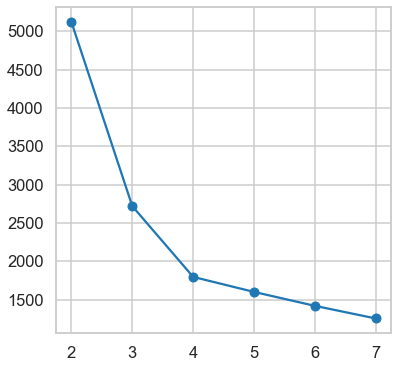

In [42]:
plt.plot(list(range(2, 8)), inertia_hist, marker='o')


### clustering colors from an image

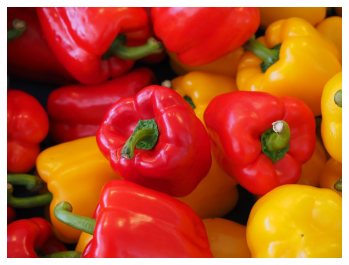

In [21]:
img = plt.imread('data/peppers.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

The image above has 480 pixels in height and 640 pixels in width. Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create  $256^3$=16,777,216  unique colors.

In [44]:
R, G, B = 0, 255, 100

(-0.5, 5.5, 0.5, -0.5)

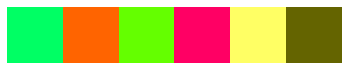

In [53]:
plt.imshow([np.array([[R, G, B], [G, B, R], [B, G, R], [G, R, B], [G, G, B], [B, B, R]]).astype('uint8')])
plt.axis('off')

In [24]:
img_flat = img.reshape(img.shape[0]*img.shape[1], 3)

In [26]:
img_flat.shape

(307200, 3)

In [28]:
K_m = KMeans(n_clusters=7, random_state=24)
K_m = K_m.fit(img_flat)

In [29]:
img_flat2 = img_flat.copy()

In [30]:
for i in np.unique(K_m.labels_):
    img_flat2[K_m.labels_==i, :] = K_m.cluster_centers_[i]

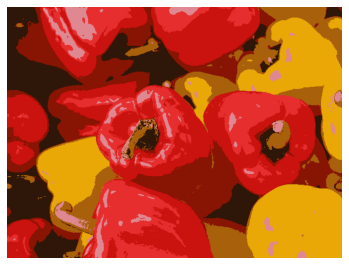

In [33]:
img2 = plt.imshow(img_flat2.reshape(img.shape))
plt.axis('off')
plt.show()

In [34]:
from mpl_toolkits import mplot3d

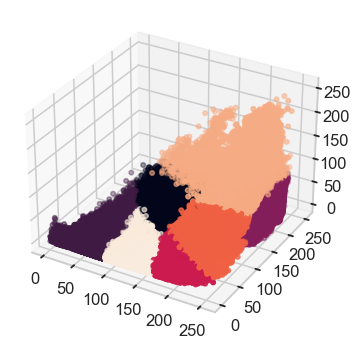

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(img_flat[:, 0], img_flat[:, 1], img_flat[:, 2], c=K_m.labels_)

In [71]:
# def image_cluster(img, k):
#     img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
#     imgflat2 = img.copy()
#     for i in np.unique(kmeans.labels_):
#         img_flat2[kmeans.labels_==i, :] = kmeans.cluster_centers_[i]
#         return img_flat2, kmeans.inertia_, kmeans.labels_
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_, kmeans.labels_

In [72]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
clusters = []
for k in k_vals:
#    print(k)
    img2, ine, clust = image_cluster(img,k)
    clusters.append(clust)
    img_list.append(img2)
    inertia.append(ine)  

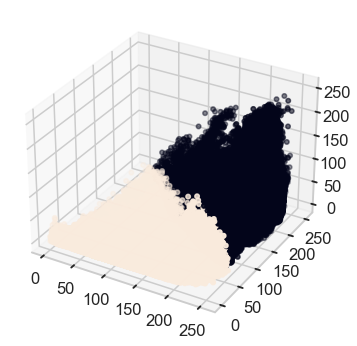

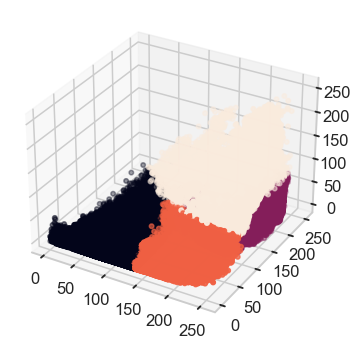

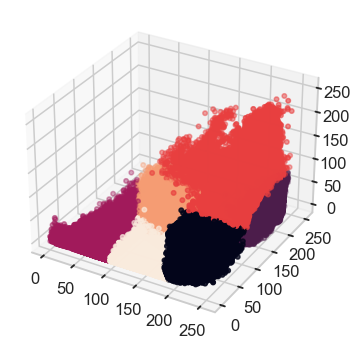

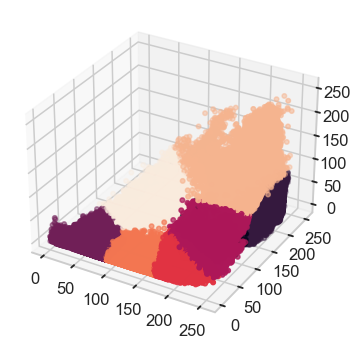

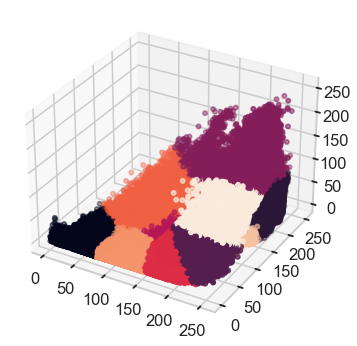

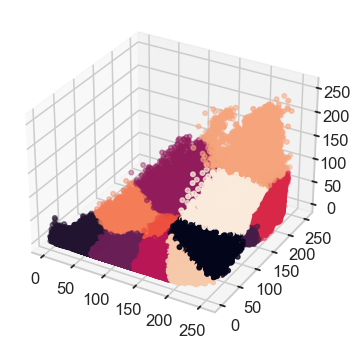

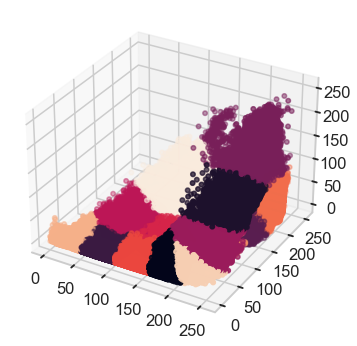

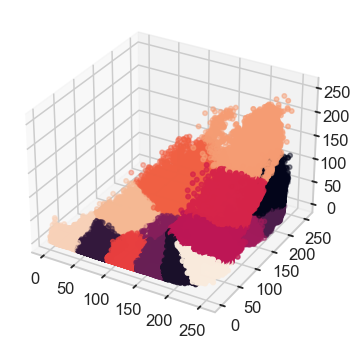

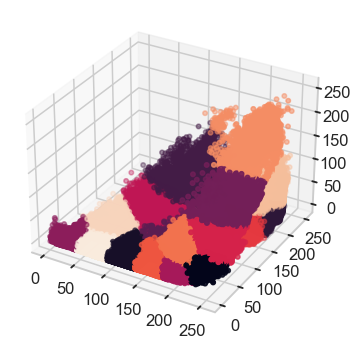

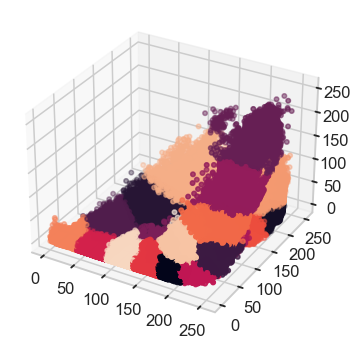

In [39]:
for i in range(len(img_list)):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(img_flat[:, 0], img_flat[:, 1], img_flat[:, 2], c=clusters[i])
    plt.show()

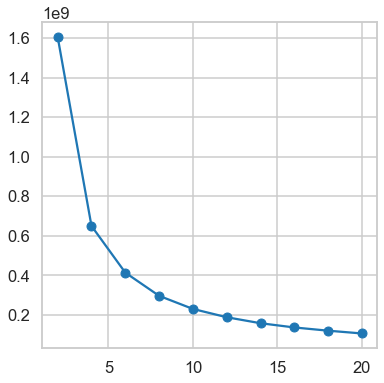

In [73]:
plt.plot(range(2, 21, 2), inertia, marker='o')

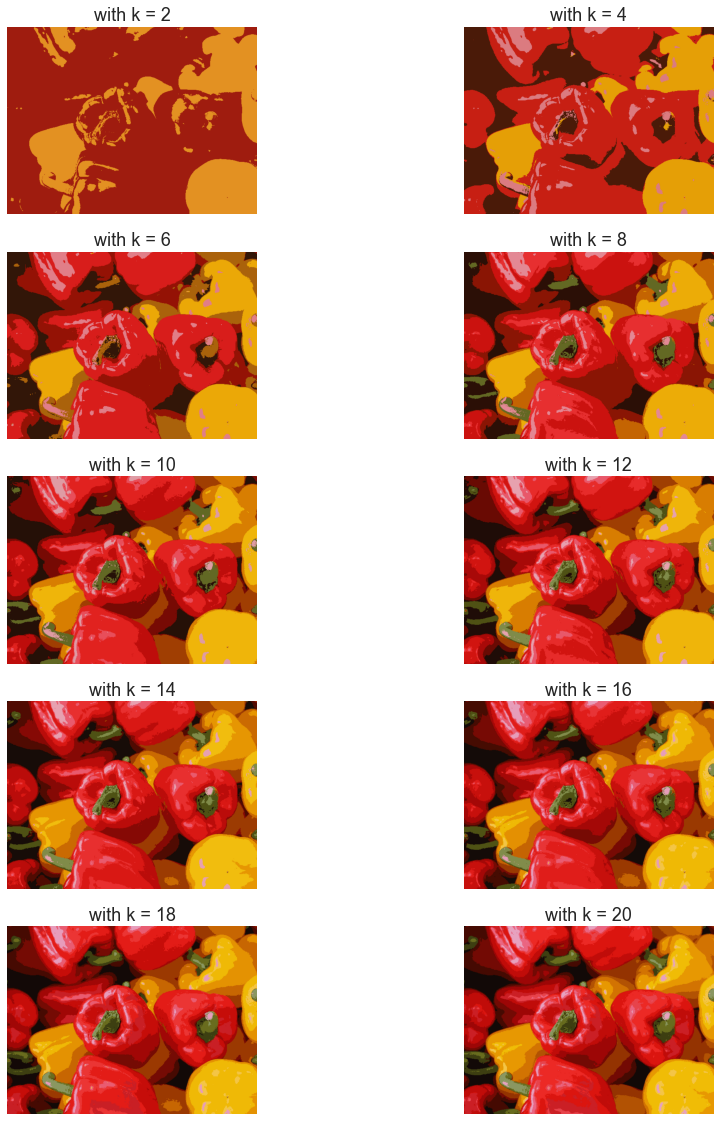

In [75]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
axlist = ax.flatten()
fig.set_figheight(20)
fig.set_figwidth(15)
for i in range(len(axlist)):
    my_img = img_list[i].reshape(img.shape)
    axlist[i].imshow(my_img)
    axlist[i].set(title=f'with k = {i*2 + 2}')
    axlist[i].axis('off')
